## Gradient Boosting Model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)
gbc_report = classification_report(y_test, gbc_pred)
gbc_matrix = confusion_matrix(y_test, gbc_pred)

print('Accuracy of GradientBoostingClassifier:', gbc_accuracy)
print('Classification report of GradientBoostingClassifier:\n', gbc_report)

Accuracy of GradientBoostingClassifier: 0.9797377234932432
Classification report of GradientBoostingClassifier:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     12784
           1       0.97      0.98      0.98     19820
           2       0.97      0.99      0.98     12092
           3       1.00      1.00      1.00     15317

    accuracy                           0.98     60013
   macro avg       0.98      0.98      0.98     60013
weighted avg       0.98      0.98      0.98     60013



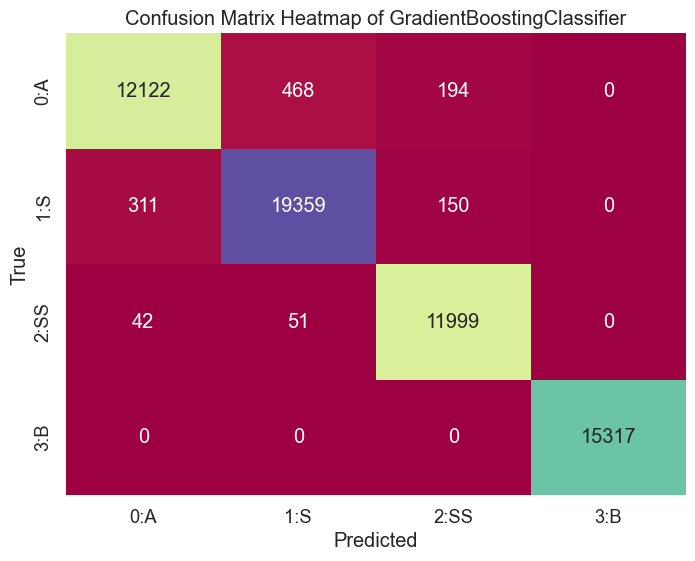

In [11]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(gbc_matrix, annot=True, fmt="d", cmap="Spectral", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS", "3:B"], yticklabels=["0:A", "1:S", "2:SS", "3:B"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of GradientBoostingClassifier")
plt.show()

In [13]:
# FP = Total predicted as a class but were actually something else
false_positives_per_class = gbc_matrix.sum(axis=0) - np.diag(gbc_matrix)
gbc_tfp = false_positives_per_class.sum()

print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(false_positives_per_class):
    print(f"  ➤ Class {i} (Label: {'A' if i==0 else 'S' if i==1 else 'SS' if i==2 else 'B'}): {fp}")

print("\n❗ Total False Positives in Model:", gbc_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 353
  ➤ Class 1 (Label: S): 519
  ➤ Class 2 (Label: SS): 344
  ➤ Class 3 (Label: B): 0

❗ Total False Positives in Model: 1216


In [14]:
import joblib

# Save the model
joblib.dump(gbc, 'Model/gbc_model.pkl')

['Model/gbc_model.pkl']